# A

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as st
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison as multi
from sklearn.linear_model import LogisticRegression
import nltk

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer as stm
import seaborn as sns

Part 1:

In [3]:
df = pd.read_csv("stock_n_hl_news.csv")

In [4]:
df.head(10)

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...
5,2017-12-26,40.271969,6936.250000,12808.90039,2680.500000,24746.19922,"According to Kensho, here's how markets have f..."
6,2017-12-27,40.279045,6939.339844,12822.00000,2682.620117,24774.30078,The S&P is on track to end the year up 20 perc...
7,2017-12-28,40.392380,6950.160156,12853.09961,2687.540039,24837.50000,UK to sink to the bottom of OECD wage growth i...
8,2018-01-02,40.670990,7006.899902,12902.70020,2695.810059,24824.00000,Jim Cramer dished out his take on whether Appl...
9,2018-01-03,40.663887,7065.529785,12957.29980,2713.060059,24922.69922,Jim Cramer revealed why he hasn’t given up on ...


In [5]:
df.shape

(483, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      483 non-null    object 
 1   AAPL      483 non-null    float64
 2   NASDAQ    483 non-null    float64
 3   NYA       483 non-null    float64
 4   SP500     483 non-null    float64
 5   DJI       483 non-null    float64
 6   Headline  483 non-null    object 
dtypes: float64(5), object(2)
memory usage: 26.5+ KB


In [7]:
# Formating the date column to change the datatype
df["Date"]=pd.to_datetime(df["Date"], format = "%Y-%m-%d")

In [8]:
df.head(10)

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...
5,2017-12-26,40.271969,6936.250000,12808.90039,2680.500000,24746.19922,"According to Kensho, here's how markets have f..."
6,2017-12-27,40.279045,6939.339844,12822.00000,2682.620117,24774.30078,The S&P is on track to end the year up 20 perc...
7,2017-12-28,40.392380,6950.160156,12853.09961,2687.540039,24837.50000,UK to sink to the bottom of OECD wage growth i...
8,2018-01-02,40.670990,7006.899902,12902.70020,2695.810059,24824.00000,Jim Cramer dished out his take on whether Appl...
9,2018-01-03,40.663887,7065.529785,12957.29980,2713.060059,24922.69922,Jim Cramer revealed why he hasn’t given up on ...


In [9]:
df.shape

(483, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      483 non-null    datetime64[ns]
 1   AAPL      483 non-null    float64       
 2   NASDAQ    483 non-null    float64       
 3   NYA       483 non-null    float64       
 4   SP500     483 non-null    float64       
 5   DJI       483 non-null    float64       
 6   Headline  483 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 26.5+ KB


Part 2:

In [11]:
# Creating a Trend column by comparing each NASDAQ entry to the previous entry and if 
# there has been a positive change then "Bullish" will be entered into that record.
# If there has been a negative change or no change then there will be an entry of 
# "Bearish. First entry will be "Bullish" by default. First a list will be created 
# with the first Bullish entry and then starting with the second NASDAQ being compared
# to the first, the Trend values will be added to the Trend list, and at the end
# the Trend list will be used to create the Trend column.
Trend = ["Bullish"]
result = ""
for nas in range(1, len(df)):

    # Checking if todays NASDAQ value is greater than the previous days
    if df.at[nas, "NASDAQ"]> df.at[nas-1, "NASDAQ"]:
        result = "Bullish"
    else:
        result = "Bearish"

    Trend.append(result)

# Creating the column
df["Trend"] = Trend

In [12]:
df.head(20)

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,Bullish
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,Bearish
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,Bearish
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,Bullish
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,Bearish
5,2017-12-26,40.271969,6936.250000,12808.90039,2680.500000,24746.19922,"According to Kensho, here's how markets have f...",Bearish
6,2017-12-27,40.279045,6939.339844,12822.00000,2682.620117,24774.30078,The S&P is on track to end the year up 20 perc...,Bullish
7,2017-12-28,40.392380,6950.160156,12853.09961,2687.540039,24837.50000,UK to sink to the bottom of OECD wage growth i...,Bullish
8,2018-01-02,40.670990,7006.899902,12902.70020,2695.810059,24824.00000,Jim Cramer dished out his take on whether Appl...,Bullish
9,2018-01-03,40.663887,7065.529785,12957.29980,2713.060059,24922.69922,Jim Cramer revealed why he hasn’t given up on ...,Bullish


In [13]:
df.shape

(483, 8)

Part 3:

In [14]:
# Creating two new columns, "StmScore" and "Sentiment," starting with creating 
# lists that will contain the eventual column entries
StmScore = []
Sentiment = []
stms = ""

# For each entry in headline, a sentiment analysis is done to determine how positive
# the headlines are about the market
for head in df["Headline"]:
    stmscore = stm().polarity_scores(head)

    # Depending on the positivity or negativity of the analysis, the day will be
    # labeled as positive negative or neutral
    if stmscore["compound"]> .7:
        stms = "positive"
        
    elif .7 >= stmscore["compound"]>= -.7:
        stms = "nuetral"
        
    else:
        stms = "negative"    

    # Adding the label to the Sentiment list and the raw score to the StmScore list
    Sentiment.append(stms)
    StmScore.append(stmscore["compound"])

# Using the lists to generate the new columns
df["StmScore"] = StmScore
df["Sentiment"] = Sentiment

In [15]:
df.head(10)

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend,StmScore,Sentiment
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,Bullish,-0.9800,negative
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,Bearish,-0.9760,negative
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,Bearish,-0.5330,nuetral
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,Bullish,0.7579,positive
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,Bearish,0.0065,nuetral
5,2017-12-26,40.271969,6936.250000,12808.90039,2680.500000,24746.19922,"According to Kensho, here's how markets have f...",Bearish,0.0000,nuetral
6,2017-12-27,40.279045,6939.339844,12822.00000,2682.620117,24774.30078,The S&P is on track to end the year up 20 perc...,Bullish,0.6622,nuetral
7,2017-12-28,40.392380,6950.160156,12853.09961,2687.540039,24837.50000,UK to sink to the bottom of OECD wage growth i...,Bullish,0.7912,positive
8,2018-01-02,40.670990,7006.899902,12902.70020,2695.810059,24824.00000,Jim Cramer dished out his take on whether Appl...,Bullish,0.8723,positive
9,2018-01-03,40.663887,7065.529785,12957.29980,2713.060059,24922.69922,Jim Cramer revealed why he hasn’t given up on ...,Bullish,0.9285,positive


In [16]:
df.tail(10)

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend,StmScore,Sentiment
473,2020-07-06,91.400681,10433.65039,12160.00000,3179.719971,26287.00000,Hou Wey Fook of DBS Bank says the U.S. equity ...,Bullish,0.9909,positive
474,2020-07-07,91.117111,10343.88965,11990.09961,3145.320068,25890.19922,Washington Crossing Advisors' Chad Morganlande...,Bearish,-0.8135,negative
475,2020-07-08,93.239227,10492.50000,12086.40039,3169.939941,26067.30078,Boohoo must take fashion more seriously after ...,Bullish,-0.9772,negative
476,2020-07-09,93.640182,10547.75000,11928.59961,3152.050049,25706.09961,Boohoo shares bounce back after pledge to impr...,Bullish,-0.9958,negative
477,2020-07-10,93.803986,10617.44043,12075.59961,3185.040039,26075.30078,Estate agents in England report surge of inter...,Bullish,0.2672,nuetral
478,2020-07-13,93.371246,10390.83984,12014.70020,3155.219971,26085.80078,Salesforce CEO Marc Benioff told CNBC's Jim Cr...,Bearish,0.9936,positive
479,2020-07-14,94.916397,10488.58008,12204.20020,3197.520020,26642.59961,"""Mad Money"" host Jim Cramer rings the lightnin...",Bullish,-0.9522,negative
480,2020-07-15,95.569176,10550.49023,12391.29980,3226.560059,26870.09961,"""We've been able to capture these cultural mom...",Bullish,0.9985,positive
481,2020-07-16,94.393204,10473.83008,12350.09961,3215.570068,26734.69922,"""Look for the stocks of high-quality companies...",Bearish,0.9780,positive
482,2020-07-17,94.202499,10503.19043,12402.70020,3224.729980,26671.90039,"""Mad Money"" host Jim Cramer recommended buying...",Bullish,-0.9631,negative


In [17]:
df.shape

(483, 10)

Part 4:

In [18]:
# Creating an ols linear regression modle comparing how well AAPL is predicted by 
# StmScore
Results = ols ("AAPL ~ StmScore", data=df).fit()
print(Results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     13.16
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           0.000316
Time:                        23:55:21   Log-Likelihood:                -1985.5
No. Observations:                 483   AIC:                             3975.
Df Residuals:                     481   BIC:                             3983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.6547      0.675     78.044      0.0

In [19]:
# Due to a low Durbin-Watson constant, I will create a new column with the daily
# change of AAPL to make sure correlation isn't just due to each day's AAPL value
# being determined by the previous day's

# Creating a list to store apple values. First day is set to zero as there is
# no previous day to compare it to.
AAPL_change = [0]
diff = ""

# Finding the difference between the current day's apple stock value and the previous
# day's. Starting with the second day.
for apple in range(1, len(df)):
    diff = df.at[apple, "AAPL"] - df.at[apple-1, "AAPL"]

    # Adding the difference to the list
    AAPL_change.append(diff)

# Adding the column to the table and populating it with the list.
df["AAPL_change"] = AAPL_change

In [20]:
df.head(20)

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend,StmScore,Sentiment,AAPL_change
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,Bullish,-0.9800,negative,0.000000
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,Bearish,-0.9760,negative,-0.443871
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,Bearish,-0.5330,nuetral,-0.044868
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,Bullish,0.7579,positive,0.155830
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,Bearish,0.0065,nuetral,0.000000
5,2017-12-26,40.271969,6936.250000,12808.90039,2680.500000,24746.19922,"According to Kensho, here's how markets have f...",Bearish,0.0000,nuetral,-1.048286
6,2017-12-27,40.279045,6939.339844,12822.00000,2682.620117,24774.30078,The S&P is on track to end the year up 20 perc...,Bullish,0.6622,nuetral,0.007076
7,2017-12-28,40.392380,6950.160156,12853.09961,2687.540039,24837.50000,UK to sink to the bottom of OECD wage growth i...,Bullish,0.7912,positive,0.113335
8,2018-01-02,40.670990,7006.899902,12902.70020,2695.810059,24824.00000,Jim Cramer dished out his take on whether Appl...,Bullish,0.8723,positive,0.278610
9,2018-01-03,40.663887,7065.529785,12957.29980,2713.060059,24922.69922,Jim Cramer revealed why he hasn’t given up on ...,Bullish,0.9285,positive,-0.007103


In [21]:
df.shape

(483, 11)

In [22]:
# Carrying out new linear regression
Results = ols ("AAPL_change ~ StmScore", data=df).fit()
print(Results.summary())

                            OLS Regression Results                            
Dep. Variable:            AAPL_change   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3646
Date:                Fri, 01 Aug 2025   Prob (F-statistic):              0.546
Time:                        23:55:21   Log-Likelihood:                -971.75
No. Observations:                 483   AIC:                             1948.
Df Residuals:                     481   BIC:                             1956.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1053      0.083      1.273      0.2

In [23]:
# Very high p-value so will just check if there is a lag and the headlines
# more clearly affect the next day's AAPL value. Creating a new column
# with the previous days StmScore
Previous_day_stm = [0]
prev = 0
for now in range(1, len(df)):
    prev = df.at[now-1, "StmScore"]
    
    Previous_day_stm.append(prev)

df["Previous_day_stm"] = Previous_day_stm

In [24]:
df.head(20)

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend,StmScore,Sentiment,AAPL_change,Previous_day_stm
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,Bullish,-0.9800,negative,0.000000,0.0000
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,Bearish,-0.9760,negative,-0.443871,-0.9800
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,Bearish,-0.5330,nuetral,-0.044868,-0.9760
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,Bullish,0.7579,positive,0.155830,-0.5330
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,Bearish,0.0065,nuetral,0.000000,0.7579
5,2017-12-26,40.271969,6936.250000,12808.90039,2680.500000,24746.19922,"According to Kensho, here's how markets have f...",Bearish,0.0000,nuetral,-1.048286,0.0065
6,2017-12-27,40.279045,6939.339844,12822.00000,2682.620117,24774.30078,The S&P is on track to end the year up 20 perc...,Bullish,0.6622,nuetral,0.007076,0.0000
7,2017-12-28,40.392380,6950.160156,12853.09961,2687.540039,24837.50000,UK to sink to the bottom of OECD wage growth i...,Bullish,0.7912,positive,0.113335,0.6622
8,2018-01-02,40.670990,7006.899902,12902.70020,2695.810059,24824.00000,Jim Cramer dished out his take on whether Appl...,Bullish,0.8723,positive,0.278610,0.7912
9,2018-01-03,40.663887,7065.529785,12957.29980,2713.060059,24922.69922,Jim Cramer revealed why he hasn’t given up on ...,Bullish,0.9285,positive,-0.007103,0.8723


In [25]:
df.shape

(483, 12)

In [26]:
# Doing our third linear analysis seeing if AAPL change is influenced by the previous
# day's StmScore to a statistically significant extent
Results = ols ("AAPL_change ~ Previous_day_stm", data=df).fit()
print(Results.summary())

                            OLS Regression Results                            
Dep. Variable:            AAPL_change   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.190
Date:                Fri, 01 Aug 2025   Prob (F-statistic):              0.276
Time:                        23:55:21   Log-Likelihood:                -971.34
No. Observations:                 483   AIC:                             1947.
Df Residuals:                     481   BIC:                             1955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1154      0.083  

In the initial regression between Stm_Score and AAPL, the R-Sqaured was quite low with .027 but the p-value (and probability of F-statistic which are the same since there is only one independent variable) was nearly 0, showing there was a statistically significant influence of Stm_Score on AAPL. However, the low R-Squared means that there is a lot of variation in AAPL that is not explained by it. At the same time it is surprising that the Stm_Score coefficient is negative, but this is possible if people like to buy the stock as a hedge against the larger market. However, the Durbin-Watson coefficient is very low, suggesting that the p-value might just arrise from the fact that each days AAPL stock value is correlated to the previous day's value. As an attempt to reslove this, I isolated the daily change in AAPL. Perhaps daily percent change would be even better, but if there is a correlation then it should still be apparent, especially since APPL values don't change all that much. The results of that regression had an R-squared of near zero. The p-value then was .54 which does not show statistical significance and we fail to regect the null hypothesis. 

Part 5:

In [27]:
# Creating a dummy variable collumn for Trend
df["Trend_dummy"] = [0 if tren == "Bearish" else 1 for tren in df["Trend"]]

In [28]:
df.head(20)

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend,StmScore,Sentiment,AAPL_change,Previous_day_stm,Trend_dummy
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,Bullish,-0.9800,negative,0.000000,0.0000,1
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,Bearish,-0.9760,negative,-0.443871,-0.9800,0
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,Bearish,-0.5330,nuetral,-0.044868,-0.9760,0
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,Bullish,0.7579,positive,0.155830,-0.5330,1
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,Bearish,0.0065,nuetral,0.000000,0.7579,0
5,2017-12-26,40.271969,6936.250000,12808.90039,2680.500000,24746.19922,"According to Kensho, here's how markets have f...",Bearish,0.0000,nuetral,-1.048286,0.0065,0
6,2017-12-27,40.279045,6939.339844,12822.00000,2682.620117,24774.30078,The S&P is on track to end the year up 20 perc...,Bullish,0.6622,nuetral,0.007076,0.0000,1
7,2017-12-28,40.392380,6950.160156,12853.09961,2687.540039,24837.50000,UK to sink to the bottom of OECD wage growth i...,Bullish,0.7912,positive,0.113335,0.6622,1
8,2018-01-02,40.670990,7006.899902,12902.70020,2695.810059,24824.00000,Jim Cramer dished out his take on whether Appl...,Bullish,0.8723,positive,0.278610,0.7912,1
9,2018-01-03,40.663887,7065.529785,12957.29980,2713.060059,24922.69922,Jim Cramer revealed why he hasn’t given up on ...,Bullish,0.9285,positive,-0.007103,0.8723,1


In [29]:
df.shape

(483, 13)

In [30]:
# Dropping all columns other than the predictor and outcome columns of Trend_dummy and 
# StmScore
xy = df.drop(["Trend", "Sentiment", "Date", "AAPL", "NASDAQ", "NYA",
              "SP500", "DJI", "Headline", "AAPL_change",
              "Previous_day_stm"], axis = 1)

In [31]:
xy.head(10)

,StmScore,Trend_dummy
0,-0.9800,1
1,-0.9760,0
2,-0.5330,0
3,0.7579,1
4,0.0065,0
5,0.0000,0
6,0.6622,1
7,0.7912,1
8,0.8723,1
9,0.9285,1


In [32]:
xy.shape

(483, 2)

In [33]:
# Creating the predictor dataframe
x = xy.drop(["Trend_dummy"], axis = 1)

In [34]:
x.head(10)

,StmScore
0,-0.9800
1,-0.9760
2,-0.5330
3,0.7579
4,0.0065
5,0.0000
6,0.6622
7,0.7912
8,0.8723
9,0.9285


In [35]:
x.shape

(483, 1)

In [36]:
# Creating the outcome dataframe
y = xy.drop(["StmScore"], axis = 1)

In [37]:
y

,Trend_dummy
0,1
1,0
2,0
3,1
4,0
...,...
478,0
479,1
480,1
481,0


In [38]:
y.shape

(483, 1)

In [39]:
# Separating the entries into training data and testing data with an 80/20 split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [40]:
y_train.shape

(386, 1)

In [41]:
y_test.shape

(97, 1)

In [42]:
# Creating a logistic regression model (since the outcome is catagorical with only 
# two catagories) from the training data.
model = LogisticRegression()
model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [43]:
# Using the model to predict Trend values based on the test StcScore values that
# were left out of the training
y_predict = model.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
# Comparing the predicted Trend values against the actual Trend values from the test
model.score(x_test,y_test)

0.5257731958762887

In [45]:
# Finding the coefficient for StcScores
model.coef_

array([[0.0717275]])

In [46]:
model.intercept_

array([0.32094698])

In [47]:
y_train.value_counts()

Trend_dummy
1              224
0              162
Name: count, dtype: int64

The model was not successful in predicting the trend based on sentiment scores. The model score was .525 which was just better than picking randomly. Looking at the y_predict array, it seems like it couldn't find any way to make a prediction from sentiment score and just found the best strategy was always predicting bullish as bullish was the more common result. 

In [48]:
sns.pairplot(xy)

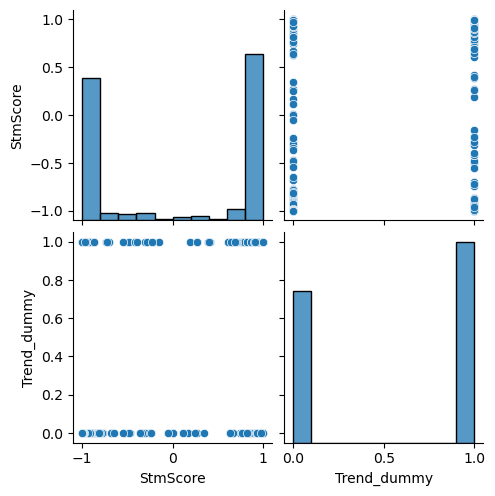

In [49]:
plt.show()

Extra Credit 1:

In [50]:
df['AAPL'].describe()

count    483.000000
mean      52.481323
std       14.975848
min       34.075405
25%       41.711218
50%       45.651524
75%       59.370152
max       95.569176
Name: AAPL, dtype: float64

In [51]:
df['NASDAQ'].describe()

count      483.000000
mean      7868.327406
std        900.399860
min       6192.919922
25%       7264.540039
50%       7628.279785
75%       8033.669922
max      10617.440430
Name: NASDAQ, dtype: float64

In [52]:
df['NYA'].describe()

count      483.000000
mean     12464.099698
std        838.996522
min       8777.379883
25%      12179.649905
50%      12622.099610
75%      12905.250000
max      14183.200200
Name: NYA, dtype: float64

In [53]:
df['SP500'].describe()

count     483.000000
mean     2819.119480
std       198.403574
min      2237.399902
25%      2704.685059
50%      2786.570068
75%      2888.700074
max      3386.149902
Name: SP500, dtype: float64

In [54]:
df['DJI'].describe()

count      483.000000
mean     25261.111627
std       1547.373767
min      18591.900390
25%      24516.699220
50%      25283.000000
75%      25973.049805
max      29551.400390
Name: DJI, dtype: float64

In [55]:
df['StmScore'].describe()

count    483.000000
mean       0.065752
std        0.926900
min       -0.999800
25%       -0.977200
50%        0.634900
75%        0.990200
max        0.999600
Name: StmScore, dtype: float64

All stocks and exchanges were relatively stable. The most significant mover was AAPL, with the largest standard deviation relative to the mean and with max and min values relatively furthest from the mean. This isn't particularly surprising as AAPL is the stock representing a single coorperation so one would expect it to be more voletitle than the indexes and exchanges. It's max was much further away from its median than its min was from the median as well as having a large third quartile. This indicates that AAPL was right skewed. The stock seems to be relatively stable around the median, never dipping down to low but with a decent number of days of extreme growth. If most of the higher days came towards the end of the data colection period then this could indicate expoential growth, but if the higher days were consistently at the beginning then it could signal exponential decline.

The NASDAQ is the opposite. While still being more volitile than NYSE and the indexes considering its large standard deviation relative to its mean. It had  a first quartile further from the median than the last quartile, indicicating that it could be left skewed. However, its high point is much further from the median and mean than the low point, and the mean is larger than the mean, so the distribution is likely a bit odd and maybe pointing to it having a period of growth or shrinkage and then restabalizing at a new level, but spending more time with a lower value.

The New York Stock Exchange is quite clearly left skewed with a lower mean the median and lower larger first and second quartiles. It Could be experiencing more of a logorythmic growth or decline period, or might have had a few market scares that it recovered from. Overall the exchange is quite stable.

The sentiment scores have a very interesting distribution. It is certainly a case of a bipolar distribution with nearly all the data congregating at the extremes of the data, -1 and 1. The first and fourth quartile contain almost exclusively nearly entirely negative or positive sentiments in the headlines. The mean is almost right in the middle but surprisingly the median is more than three times closer to the thrid quartile than it is to the first. This weird discrepency between the mean and the median tells us a lot. Firstly it means that, in the middle quartiles, a considerably larger amount of sentiment scores are postive than negative. However, the negative scores must be much closer to that extreme values, while the positive scores are more broadly distributed between 0 and .99. This is made somewhat even more surprising by the fact that the second quartile starts at larger distance away from the extreme value than the third one ends at, but the difference is to small to draw conclusions.

This generally points to that headlines are generally more positive than not, and are positive on most days. The headlines are usually extreme either all positive or all negative. Its more likely for headlines to be luke warm than slightly negative. When the news is bad news then it's nearly always terrible news. This more likely hints at how the newspaper industry tries to pull in readers than about the actual sentiments in the industry on the day that inspired those headlines.

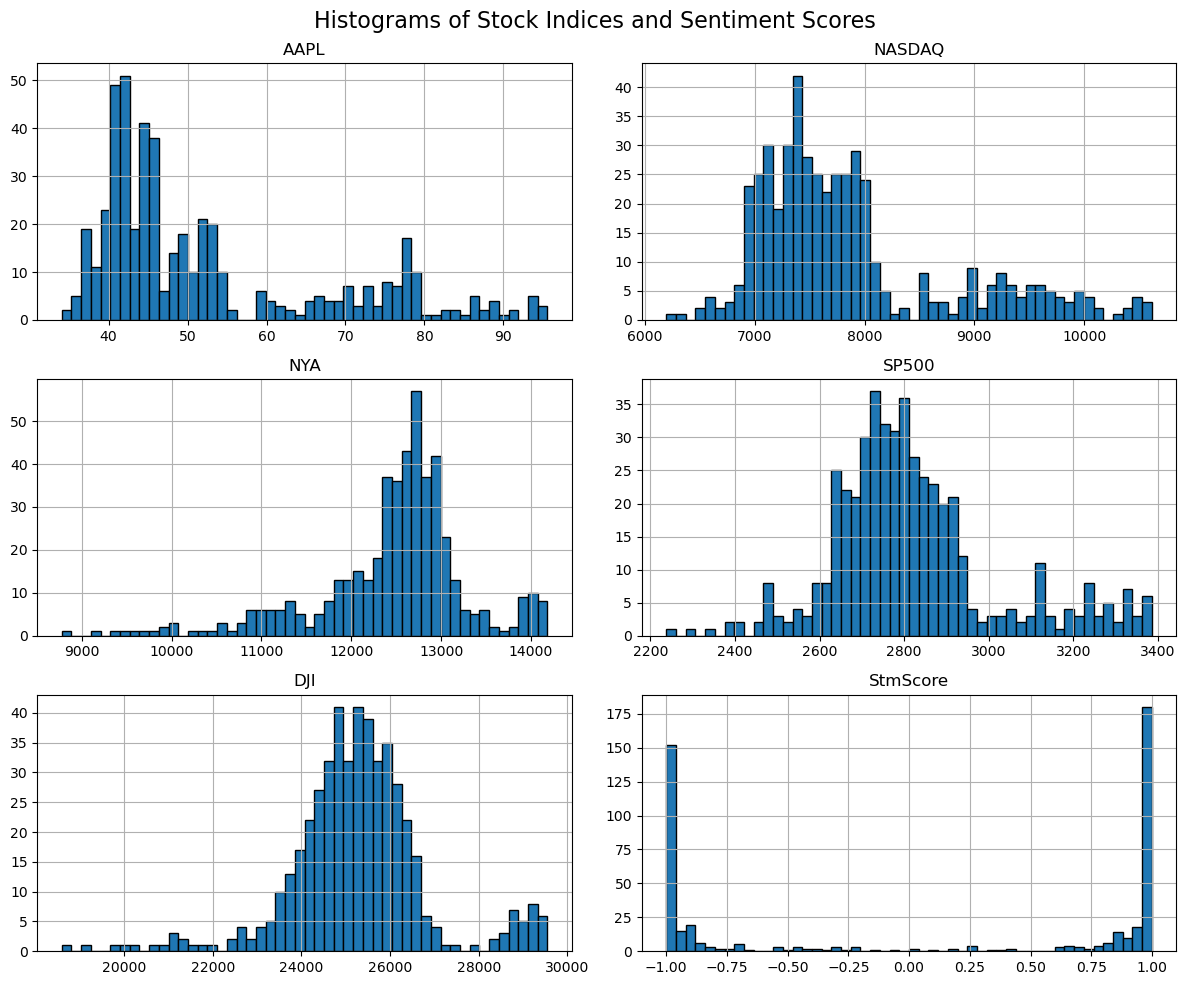

In [56]:
# Plotting histograms for the stock and sentiment columns
columns = ['AAPL', 'NASDAQ', 'NYA', 'SP500', 'DJI', 'StmScore']
df[columns].hist(bins=50, figsize=(12, 10), layout=(3, 2), edgecolor='black')
plt.suptitle("Histograms of Stock Indices and Sentiment Scores", fontsize=16)
plt.tight_layout()
plt.show()

This mostly confirms our suspicions from looking at the summary statistics. The NASDAQ is behaving more similarly to Apple than first thought, but Apple is certainly more volotile and the most volotile here as is to be expected. The two indexes are the most normally distributed and appear to be the most stable from the data. This isn't particularly surprising since they are more selective with only containing the largest business that are more stable while the exchanges can be effected by more randomness in the market. This is reflected again by the Dow Jones being even more stable than the S&P 500 considering it is a subset of some of the most well established companies on the S&P 500 and is price weighted.

In [57]:
# Dropping columns other than the numerical columns (Stocks/exchanges and Sentiment
# scores)
dfstsc = df.drop(["Trend_dummy", "Trend", "Sentiment", "Date", 
                  "Headline", "AAPL_change", "Previous_day_stm"], axis = 1)

In [58]:
dfstsc.head(20)

,AAPL,NASDAQ,NYA,SP500,DJI,StmScore
0,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,-0.9800
1,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,-0.9760
2,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,-0.5330
3,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,0.7579
4,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,0.0065
5,40.271969,6936.250000,12808.90039,2680.500000,24746.19922,0.0000
6,40.279045,6939.339844,12822.00000,2682.620117,24774.30078,0.6622
7,40.392380,6950.160156,12853.09961,2687.540039,24837.50000,0.7912
8,40.670990,7006.899902,12902.70020,2695.810059,24824.00000,0.8723
9,40.663887,7065.529785,12957.29980,2713.060059,24922.69922,0.9285


In [59]:
dfstsc.shape

(483, 6)

In [60]:
dfstsc.corr()

,AAPL,NASDAQ,NYA,SP500,DJI,StmScore
AAPL,1.000000,0.941846,-0.085380,0.751729,0.344752,-0.163202
NASDAQ,0.941846,1.000000,0.151450,0.887213,0.546378,-0.093781
NYA,-0.085380,0.151450,1.000000,0.562041,0.863321,0.260141
SP500,0.751729,0.887213,0.562041,1.000000,0.861979,0.031803
DJI,0.344752,0.546378,0.863321,0.861979,1.000000,0.187811
StmScore,-0.163202,-0.093781,0.260141,0.031803,0.187811,1.000000


None of our stocks seem to have very high correlation with the sentiment score. It is not super surprising that AAPL and NASDAQ are so closely correlated considering their distributions were so similar, but it would still require their values grow and shink on similar days. Considering that Apple is traded on the NASDAQ then its makes sense that they would move together. AAPL is the largest single stock in the world so it would likely hold a lot of sway on the NASDAQ. Interesting that AAPL and the New York Stock Exchange have a slightly negative correlation while the NASDAQ is very low with NYA. While the correlation is too small to say that one of the stock exchanges doing well points to the other doing poorly, given the general assumptions that all markets grow exponentially, and generally a rising tide lifts all boats, this either shakes up that assumption or shows that some investors are taking money out of companies on exchange and investing into companies on the other, most likely AAPL. The indexes are not surprily very heavily correlated with each other since one is a subset of the other, but interestingly the S&P500 is most heavily correlated with the NASDAQ while the Dow Jones Industrial Average barely has a correlation above .5 with it and is most closely correlated with the NYSE. This does make sense as most of DJIA's stocks are listed on New York Stock Exchange while 70% of S&P 500 companies are on the NASDAQ.

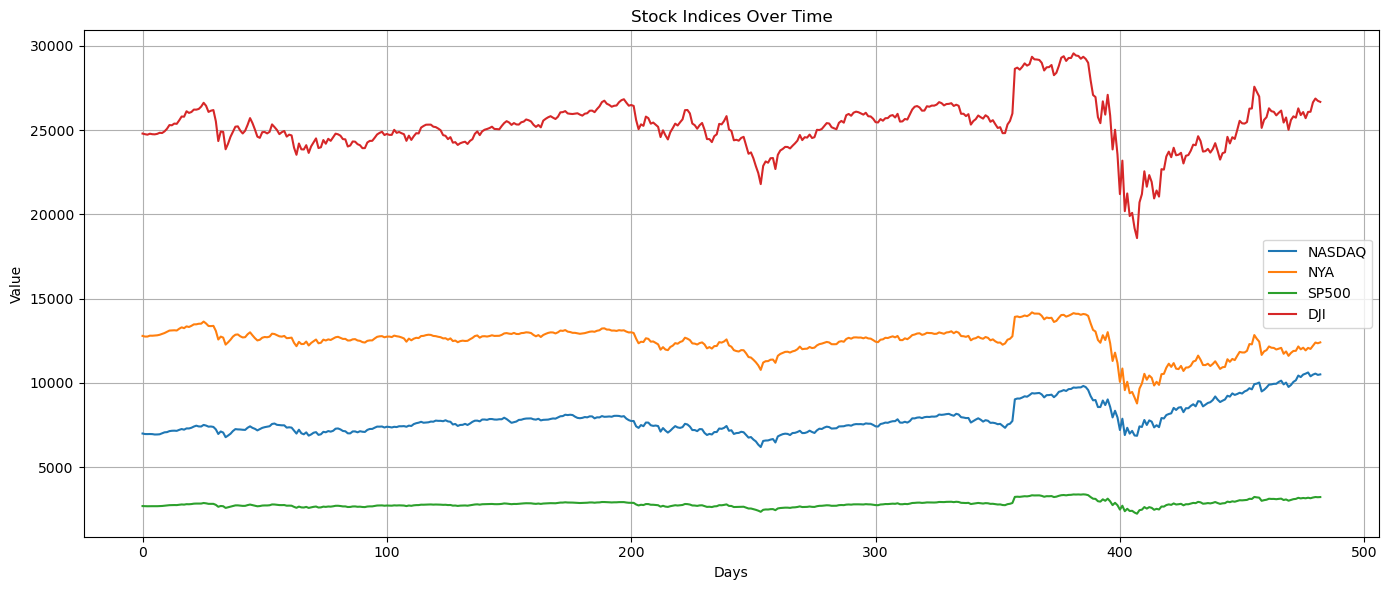

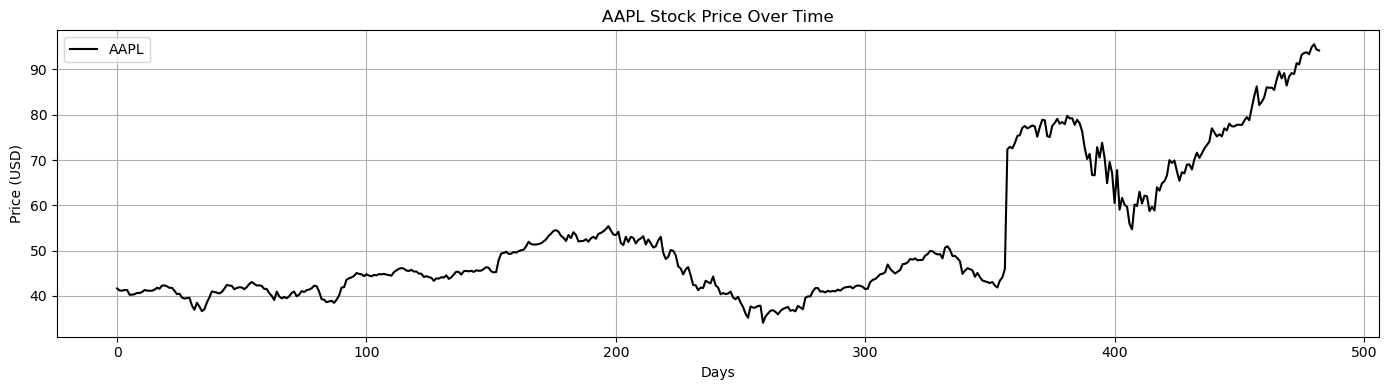

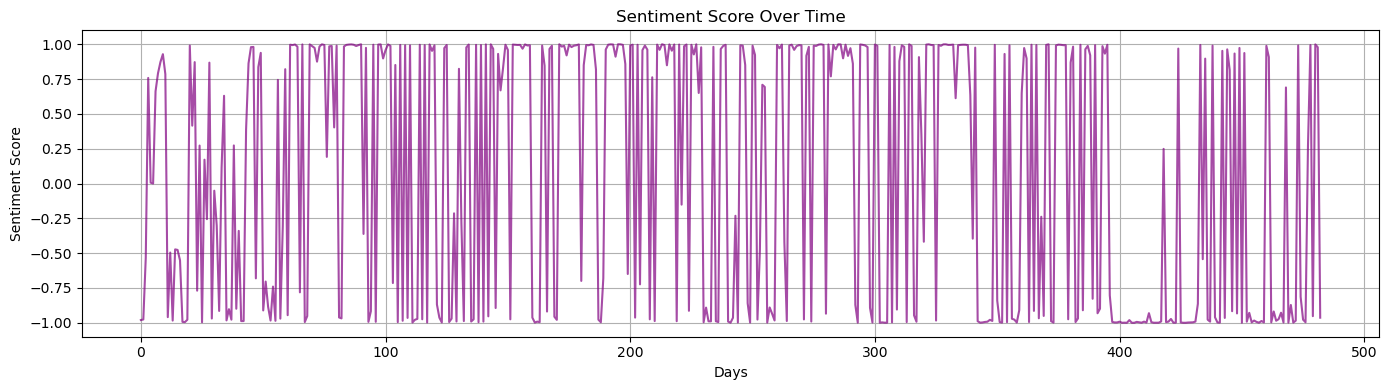

In [61]:
plt.figure(figsize=(14, 6))
for col in ['NASDAQ', 'NYA', 'SP500', 'DJI']:
    plt.plot(df.index, df[col], label=col)

plt.title('Stock Indices Over Time')
plt.xlabel('Days')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting AAPL Separately due it's stock price being much lower than the indicies and
# and exchanges
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['AAPL'], color='black', label='AAPL')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Sentiment over time
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['StmScore'], color='purple', alpha=0.7)
plt.title('Sentiment Score Over Time')
plt.xlabel('Days')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()

All stocks and industries made similar moves at similar times. The main difference seems to be the scale of each move. Apple seems to be generally more volotile as one would expect but where an index seems to have 5% loss and 5% gross, Apple seems to have 10% loss and 30% growth leading to a much larger overall increase over time. The NASDAQ and Apple seem to be the only stocks/indecies that grew in any considerable amount which makes sense as they were the most highly correlated. The sentiment is all over the place. It does seem to somewhat reflect the trends of Apple and the indicies where when the stocks are falling then the headlines are clearly more neagtive and at periods of sustained growth it is often nearly entirely positive. However, sometimes it seems to be delayed. Sometimes sentiment seems to be delayed which can particularly make sense during Covid when things like stimulus spending saw a lot of money go into the stock market but there was concern over the long term effects of that stimulus spending, leading to more mixed headlines.

In [62]:
x2 = dfstsc.drop(["AAPL", "StmScore"], axis=1)

In [63]:
x2.head(10)

,NASDAQ,NYA,SP500,DJI
0,6994.759766,12785.79980,2690.159912,24792.19922
1,6963.850098,12747.50000,2681.469971,24754.69922
2,6960.959961,12747.59961,2679.250000,24726.69922
3,6965.359863,12800.20020,2684.570068,24782.30078
4,6959.959961,12797.40039,2683.340088,24754.09961
5,6936.250000,12808.90039,2680.500000,24746.19922
6,6939.339844,12822.00000,2682.620117,24774.30078
7,6950.160156,12853.09961,2687.540039,24837.50000
8,7006.899902,12902.70020,2695.810059,24824.00000
9,7065.529785,12957.29980,2713.060059,24922.69922


In [64]:
x2.shape

(483, 4)

In [65]:
y2 = df.AAPL

In [66]:
y2.head(10)

0    41.653164
1    41.209293
2    41.164425
3    41.320255
4    41.320255
5    40.271969
6    40.279045
7    40.392380
8    40.670990
9    40.663887
Name: AAPL, dtype: float64

In [67]:
y2.shape

(483,)

In [68]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.2,random_state=40)

In [69]:
y2_train.shape

(386,)

In [70]:
y_test.shape

(97, 1)

In [71]:
model2 = LinearRegression()
model2.fit(x2_train, y2_train)

LinearRegression()

In [73]:
y2_predict = model2.predict(x2_test)
y2_predict

array([49.14823025, 38.64205024, 51.18021696, 79.95104695, 39.21544549,
       80.58434261, 37.65596367, 41.71598126, 47.82135543, 44.40727349,
       41.62142916, 41.99691497, 39.66359913, 49.61355984, 44.46135706,
       46.32185329, 42.95767627, 38.01848186, 46.00716812, 41.40075613,
       39.89675793, 73.6404602 , 45.32268142, 49.9090178 , 37.38193468,
       34.23186169, 48.94891555, 80.01291192, 86.7224107 , 69.15778261,
       50.48704036, 44.24209547, 49.78156027, 44.73776012, 53.46342133,
       73.20225638, 41.19775653, 37.00586386, 56.53783421, 38.78959479,
       42.23149291, 44.91416377, 37.23200808, 74.16986152, 36.99768959,
       72.0979182 , 72.91176392, 51.75468946, 58.25743423, 52.09575371,
       40.48192475, 72.32640252, 81.31345803, 53.21191008, 52.69149789,
       36.86196094, 49.456107  , 80.96319443, 39.23102796, 38.38034834,
       43.97491932, 80.23006793, 73.20550846, 85.6629849 , 46.22368507,
       48.43785893, 46.12680586, 88.55157021, 39.10516394, 82.44

In [74]:
model2.score(x2_test,y2_test)

0.9556239235255776

In [75]:
model.coef_

array([[0.0717275]])

In [76]:
model.intercept_

array([0.32094698])

In [77]:
dfst=dfstsc.drop(["StmScore"], axis=1)

In [78]:
dfst.head(5)

,AAPL,NASDAQ,NYA,SP500,DJI
0,41.653164,6994.759766,12785.79980,2690.159912,24792.19922
1,41.209293,6963.850098,12747.50000,2681.469971,24754.69922
2,41.164425,6960.959961,12747.59961,2679.250000,24726.69922
3,41.320255,6965.359863,12800.20020,2684.570068,24782.30078
4,41.320255,6959.959961,12797.40039,2683.340088,24754.09961


In [79]:
dfst.shape

(483, 5)

In [80]:
dfst.corr()

,AAPL,NASDAQ,NYA,SP500,DJI
AAPL,1.000000,0.941846,-0.085380,0.751729,0.344752
NASDAQ,0.941846,1.000000,0.151450,0.887213,0.546378
NYA,-0.085380,0.151450,1.000000,0.562041,0.863321
SP500,0.751729,0.887213,0.562041,1.000000,0.861979
DJI,0.344752,0.546378,0.863321,0.861979,1.000000


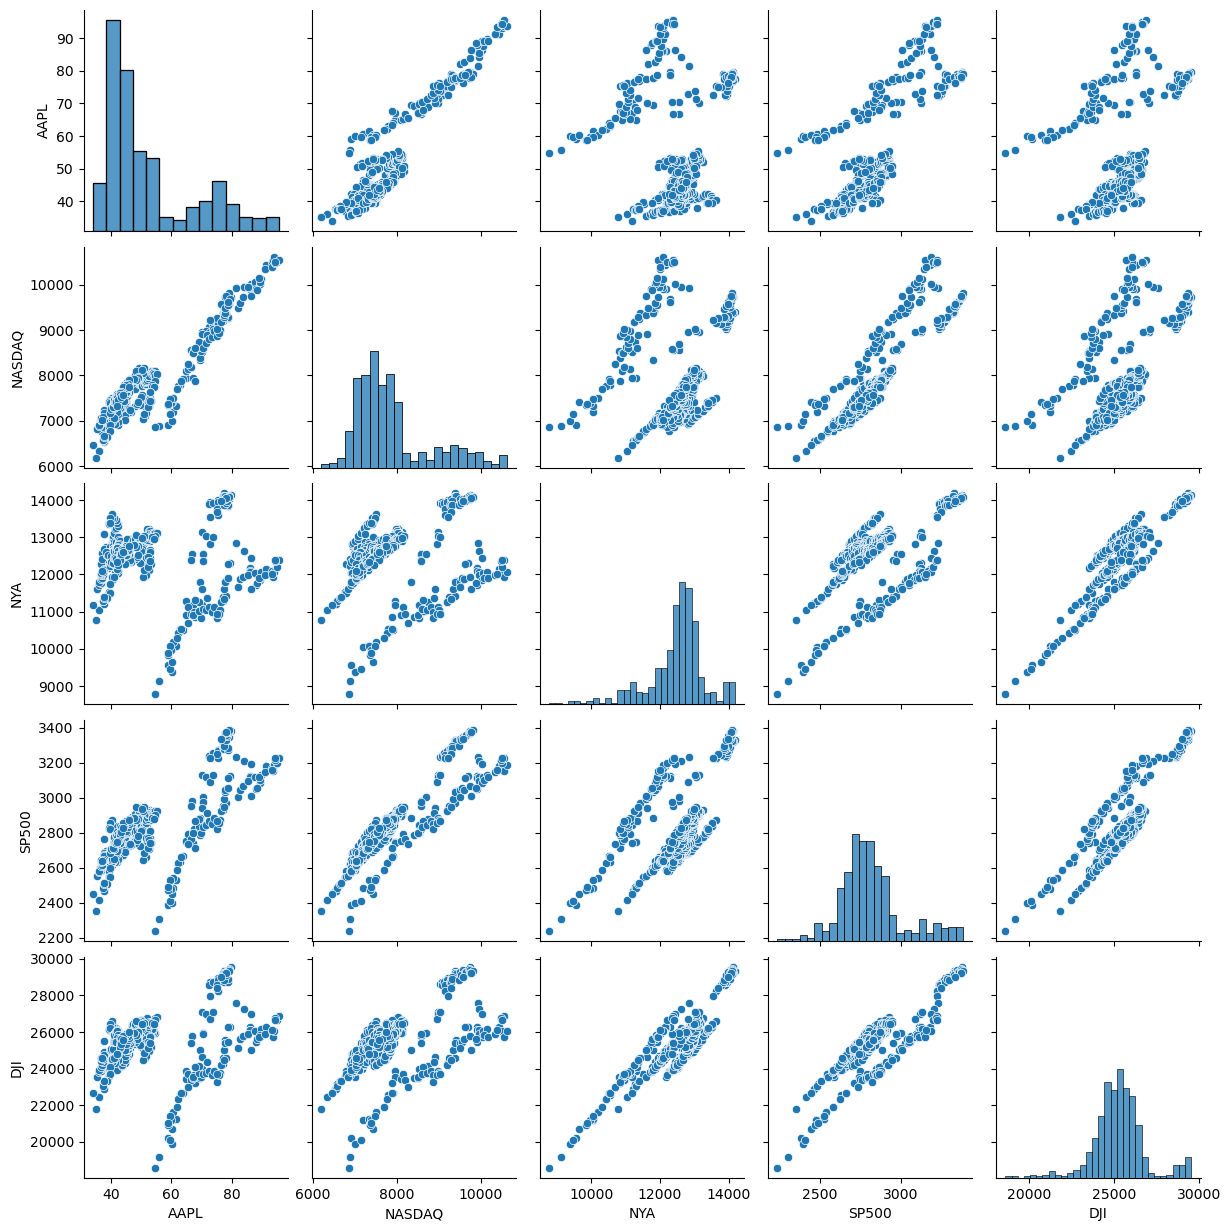

In [81]:
sns.pairplot(dfst)
plt.show()

In [82]:
x2 = add_constant(x2)
x2.head(3)

,const,NASDAQ,NYA,SP500,DJI
0,1.0,6994.759766,12785.79980,2690.159912,24792.19922
1,1.0,6963.850098,12747.50000,2681.469971,24754.69922
2,1.0,6960.959961,12747.59961,2679.250000,24726.69922


In [83]:
x2.shape

(483, 5)

In [84]:
VIFvalue = variance_inflation_factor(x2.values, 2)
print(VIFvalue)

9.783666535109516


In [85]:
for i in range(len(x2.columns)):
    print(variance_inflation_factor(x2.values, i ))

276.4183996971186
45.04607337885433
9.783666535109516
106.17745775087981
34.97948175630685


In [86]:
VIFdf = pd.DataFrame()
VIFdf["X_variables"] = x2.columns

VIFdf["VIF_Values"] = [variance_inflation_factor(x2.values, i)
                       for i in range(len(x2.columns))]

print(VIFdf)

  X_variables  VIF_Values
0       const  276.418400
1      NASDAQ   45.046073
2         NYA    9.783667
3       SP500  106.177458
4         DJI   34.979482


In [87]:
Results = ols ("AAPL ~ SP500 + NASDAQ + NYA + DJI", data=df).fit()

In [88]:
print(Results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2450.
Date:                Fri, 01 Aug 2025   Prob (F-statistic):          7.89e-317
Time:                        23:56:09   Log-Likelihood:                -1251.1
No. Observations:                 483   AIC:                             2512.
Df Residuals:                     478   BIC:                             2533.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.4243      2.453    -11.586      0.0

In [89]:
Results = ols ("AAPL ~ NASDAQ + NYA", data=df).fit()

In [90]:
print(Results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     3779.
Date:                Fri, 01 Aug 2025   Prob (F-statistic):          1.80e-294
Time:                        23:56:10   Log-Likelihood:                -1311.5
No. Observations:                 483   AIC:                             2629.
Df Residuals:                     480   BIC:                             2641.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.4817      2.718     -8.639      0.0

In [91]:
x2 = x2.drop(["SP500", "DJI"], axis=1)

In [92]:
x2.head(3)

,const,NASDAQ,NYA
0,1.0,6994.759766,12785.79980
1,1.0,6963.850098,12747.50000
2,1.0,6960.959961,12747.59961


In [93]:
VIFvalue = variance_inflation_factor(x2.values, 2)
print(VIFvalue)

1.0234754941163906


In [94]:
VIFdf = pd.DataFrame()
VIFdf["X_variables"] = x2.columns

VIFdf["VIF_Values"] = [variance_inflation_factor(x2.values, i)
                       for i in range(len(x2.columns))]

print(VIFdf)

  X_variables  VIF_Values
0       const  265.339438
1      NASDAQ    1.023475
2         NYA    1.023475


Our best model for predicting the value of Apple is by just using the NASDAQ and the New York Stock Exchange. Very high positive correlation at .94 R-squared and p-values close to zero. TheVIF is close to 1 for both so nearly no mutal colinearity.